<a href="https://colab.research.google.com/github/MohanRajcom7/MINIPROJECTINFO/blob/main/impFINALMINPRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd
import requests

In [94]:
# Base URL without the offset parameter
base_url = 'https://www.booking.com/searchresults.en-gb.html?ss=New+Delhi%2C+Delhi+NCR%2C+India&ssne=Salzburg&ssne_untouched=Salzburg&label=gen173nr-1FCAEoggI46AdIM1gEaGyIAQGYAQm4ARfIAQzYAQHoAQH4AQOIAgGoAgO4At-xprMGwAIB0gIkZDRlNGZjMTktZjY0OS00N2Q3LTkwMTItOTZhMDY2ODU3NGRl2AIG4AIB&aid=304142&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-2106102&dest_type=city&ac_position=0&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=18d95d09f178030f&ac_meta=GhAxOGQ5NWQwOWYxNzgwMzBmIAAoATICZW46A2RlbEAASgBQAA%3D%3D&checkin=2024-06-22&checkout=2024-06-23&group_adults=2&no_rooms=1&group_children=0'

headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

In [95]:
hotel_results = []

# Loop through pages 1 to 40
for page_number in range(0, 250,25):
    url = base_url.format(page_number)

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    for el in soup.find_all("div", {"data-testid": "property-card"}):
        # Extract rating, handling cases where it's not present
        rating_element = el.find("div", {"data-testid": "review-score"})
        rating = rating_element.text.strip().split(" ")[0] if rating_element else "N/A"  # Handle missing ratings

        hotel_results.append({
            "name": el.find("div", {"data-testid": "title"}).text.strip(),
            'description': el.find('div', {'data-testid': 'recommended-units', 'class': 'ccdd44706b'}).text.strip(),
            "location": el.find("span", {"data-testid": "address"}).text.strip(),
            "pricing": el.find("span", {"data-testid": "price-and-discounted-price"}).text.strip(),
            "rating": rating  # Use the extracted or default rating
        })

# Create DataFrame from the collected results
hotels = pd.DataFrame(hotel_results)

In [96]:
hotels.head()

,name,description,location,pricing,rating
0,Hotel Belwood,Standard Double Room1 large double bedBreakfas...,New Delhi,€ 15,10Scored
1,ibis New Delhi Aerocity - An Accor Brand,Standard Queen Room1 large double bedFree canc...,"Aerocity, New Delhi",€ 46,6.8Scored
2,Jupiter Plaza Delhi Airport,Superior Double Room1 large double bedFree can...,New Delhi,€ 16,7.8Scored
3,Airport Hotel Swan Near Delhi Airport,Deluxe Room1 double bedFree cancellationNo pre...,New Delhi,€ 10,7.8Scored
4,The Empirre Suites Near IGI Airport,Superior King Room1 large double bedBreakfast ...,New Delhi,€ 16,9.1Scored


In [97]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         250 non-null    object
 1   description  250 non-null    object
 2   location     250 non-null    object
 3   pricing      250 non-null    object
 4   rating       250 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [98]:
hotels['pricing'] = hotels['pricing'].str.replace('[€,US\xa0]', '', regex=True).astype(float)
hotels['rating'] = hotels['rating'].str.extract('(\d+\.\d+)')
# Convert the 'rating' column to numeric
hotels['rating'] = pd.to_numeric(hotels['rating'], errors='coerce')

In [99]:

# Drop rows with missing values in the 'rating' column
hotels.dropna(subset=['rating'],inplace=True)

In [100]:
# Descriptive statistics
print(hotels.describe())

# Unique values and value counts
print(hotels['location'].value_counts())

          pricing      rating
count  240.000000  240.000000
mean    25.741667    8.251667
std     22.960580    0.609820
min     10.000000    6.800000
25%     14.000000    7.900000
50%     17.000000    8.100000
75%     30.000000    8.500000
max    132.000000    9.800000
location
New Delhi                         134
Paharganj, New Delhi               71
Aerocity, New Delhi                14
Mahipalpur, New Delhi              12
Central Delhi, New Delhi            4
East Delhi, New Delhi               3
Malviya Nagar, New Delhi            1
Mayur Vihar Phase 1, New Delhi      1
Name: count, dtype: int64


In [ ]:
# Correlation matrix
correlation_matrix = hotels.corr()
print(correlation_matrix)

ValueError: could not convert string to float: 'FabExpress B Zone'

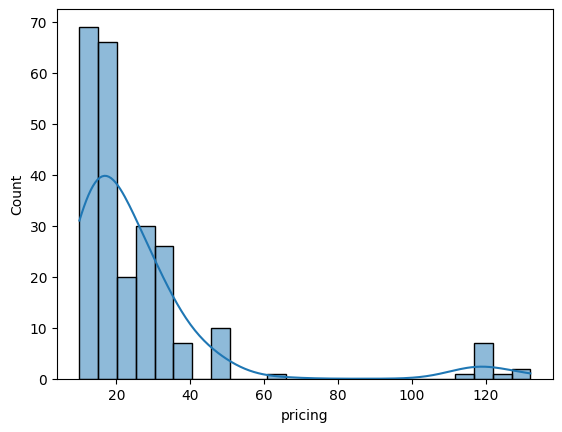

In [101]:
# Distribution plot for pricing
sns.histplot(hotels['pricing'], kde=True)
plt.show()

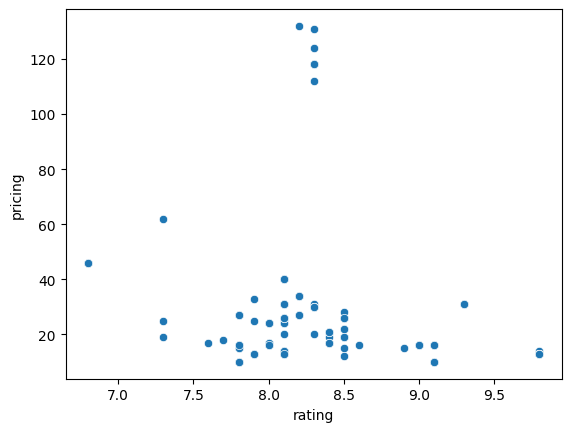

In [102]:
# Scatter plot for rating vs pricing
sns.scatterplot(data=hotels, x='rating', y='pricing')
plt.show()

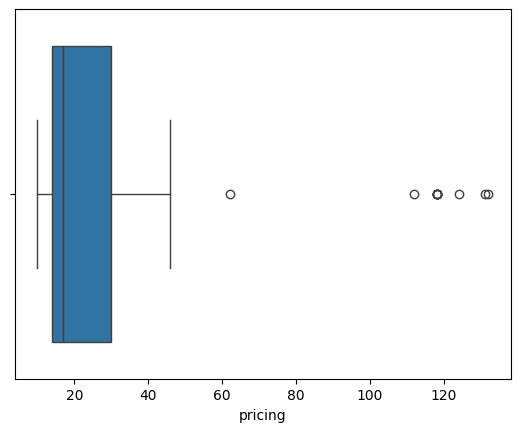

In [111]:
# Box plot for 'pricing'
sns.boxplot(x=hotels['pricing'])
plt.show()

In [104]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hotels[['rating']], hotels['pricing'], test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 479.61028237753754
R-squared: 0.018417764952754823


In [105]:
Q1 = hotels['pricing'].quantile(0.25)
Q3 = hotels['pricing'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

count_outliers = hotels[(hotels['pricing'] < lower_bound) | (hotels['pricing'] > upper_bound)].shape[0]

print(f'Number of outliers in pricing: {count_outliers}')

Number of outliers in pricing: 12


In [106]:
Q1 = hotels['pricing'].quantile(0.25)
Q3 = hotels['pricing'].quantile(0.75)
IQR = Q3 - Q1

In [107]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = hotels[(hotels['pricing'] < lower_bound) | (hotels['pricing'] > upper_bound)]
# Remove outliers
hotels_no_outliers = hotels[(hotels['pricing'] >= lower_bound) & (hotels['pricing'] <= upper_bound)]

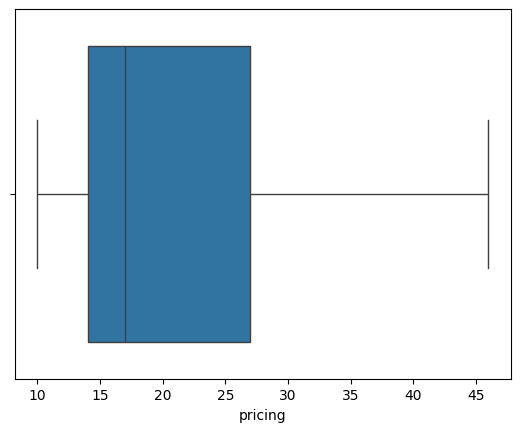

In [108]:
# Box plot for 'pricing'
sns.boxplot(x=hotels_no_outliers['pricing'])
plt.show()

In [109]:
# Prepare the data
X = hotels_no_outliers[['rating']]
y = hotels_no_outliers['pricing']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r_squared = r2_score(y_test, predictions)
    results[model_name] = {'MSE': mse, 'R-squared': r_squared}

# Print the results
for model_name, scores in results.items():
    print(f"{model_name} - MSE: {scores['MSE']}, R-squared: {scores['R-squared']}")

# Choose the best model based on MSE or R-squared (based on preference)
best_model = min(results, key=lambda k: results[k]['MSE'])
print(f"\nBest Model based on MSE: {best_model}")

Linear Regression - MSE: 74.89504986756305, R-squared: 0.12397155678525507
Decision Tree Regressor - MSE: 21.566087449272448, R-squared: 0.7477469332375528
Random Forest Regressor - MSE: 21.893653021255677, R-squared: 0.7439154816451894
Gradient Boosting Regressor - MSE: 21.52442746147576, R-squared: 0.7482342195711411

Best Model based on MSE: Gradient Boosting Regressor
